<a href="https://colab.research.google.com/github/barbarehh/Clustering_Wine/blob/main/clustering_examp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Check Data**

In [58]:
import pandas as pd

df=pd.read_csv("wine-clustering.csv")
print(df.isnull().sum())
print(df.info())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non

**Standardize the Data**
- Standardizes the data to have a mean of 0 and a standard deviation of 1. *This ensures all features work equally to the clustering process.*
- K-Means clustering is sensitive to feature scaling. Features with larger magnitudes can dominate distance calculations.

In [59]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

**Elbow Method To Determine Optimal Number of Cluster**
- Computes the inertia (sum of squared distances from points to their cluster centers) for different numbers of clusters
- where inertia decreases significantly before leveling off suggests the best number of clusters



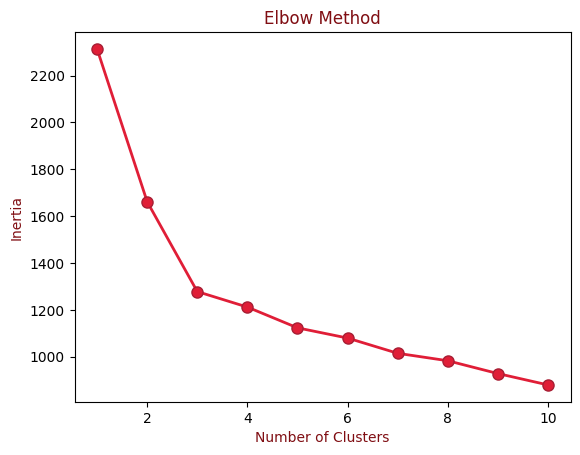

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o', color="#e01e37",mfc='#e01e37', mec='#a71e34',linewidth=2, markersize=8)
plt.title('Elbow Method', color="#800e13")
plt.xlabel('Number of Clusters', color="#800e13")
plt.ylabel('Inertia',color="#800e13")
plt.show()


**K-Means Clustering**
- Initializes K-Means with the chosen number of clusters (previously)
- Assigns each data point to a cluster and appends the cluster labels to the original dataset



In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels


**PCA Visualization**
- Reduces data to 2 dimensions using PCA for visualization
- Plots clusters with different colors and marks the cluster centroids

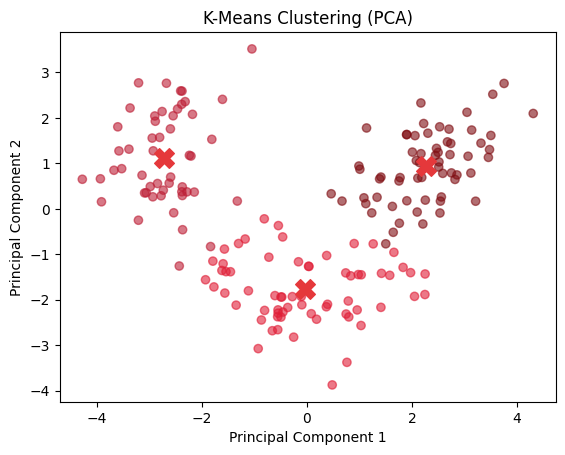

In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


wine_palette = ['#e01e37', '#bd1f36', '#800e13']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

colors = [wine_palette[label] for label in cluster_labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='#e5383b', marker='X', s=200, label='Centroids')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA)')
plt.show()


**t-SNE Visualization**

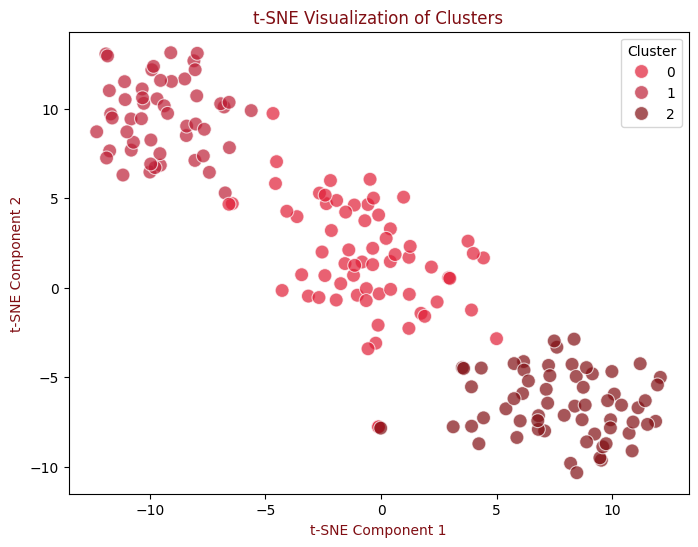

In [88]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette=wine_palette, s=100,  alpha=0.7)
plt.title('t-SNE Visualization of Clusters', color="#800e13")
plt.xlabel('t-SNE Component 1', color="#800e13")
plt.ylabel('t-SNE Component 2', color="#800e13")
plt.legend(title='Cluster', loc='best')
plt.show()


**Feature Distribution Across Clusters (Box Plot)**

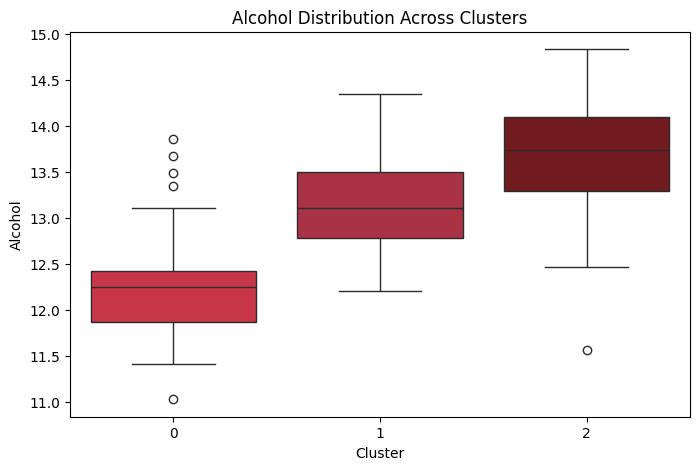

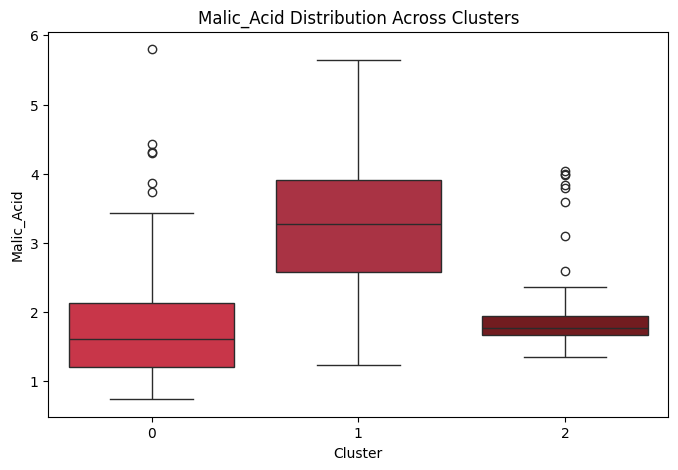

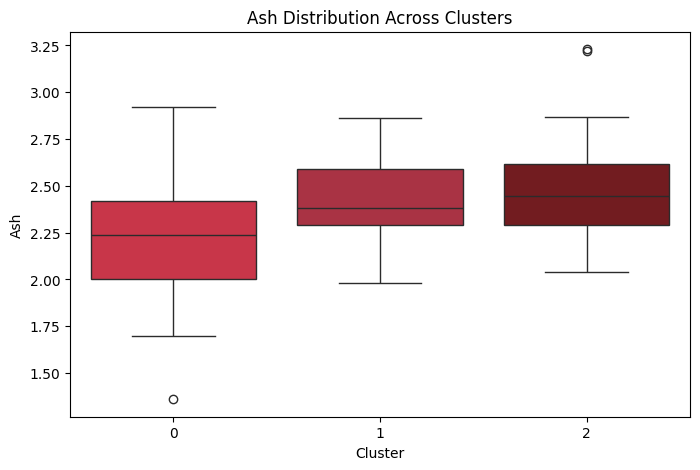

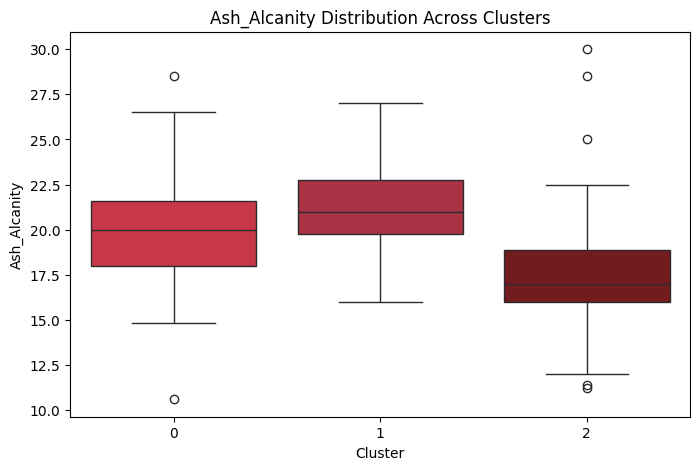

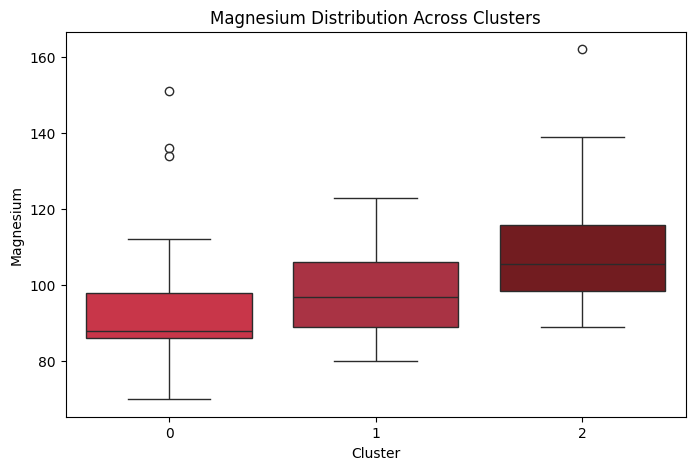

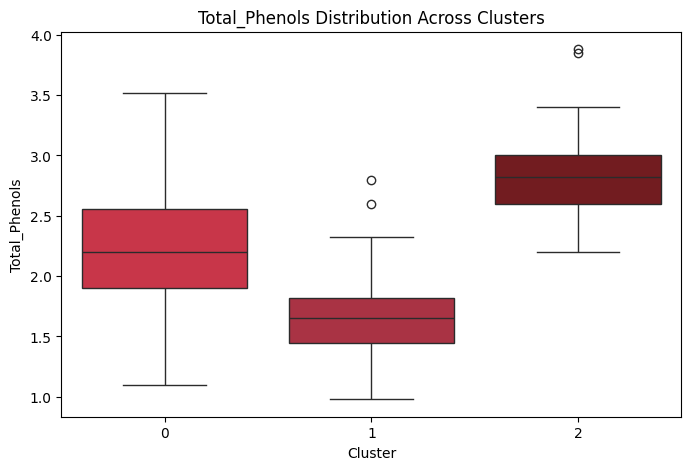

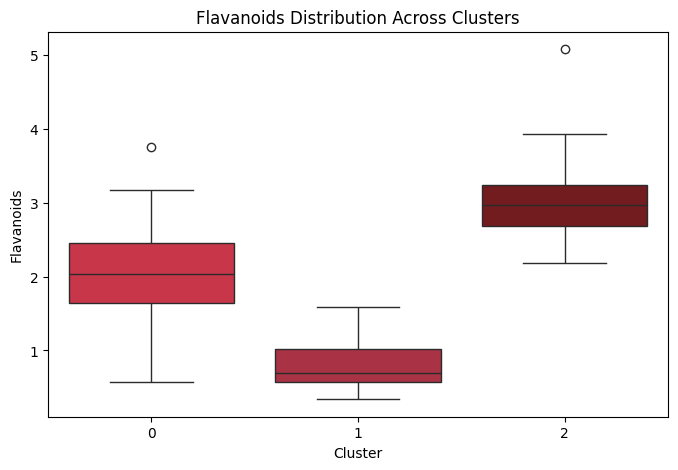

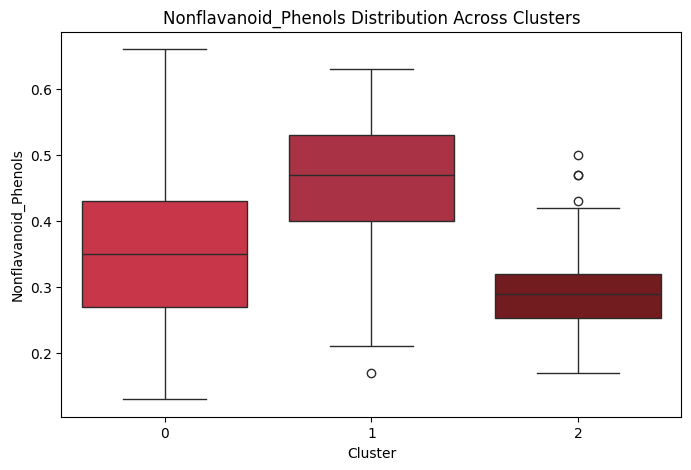

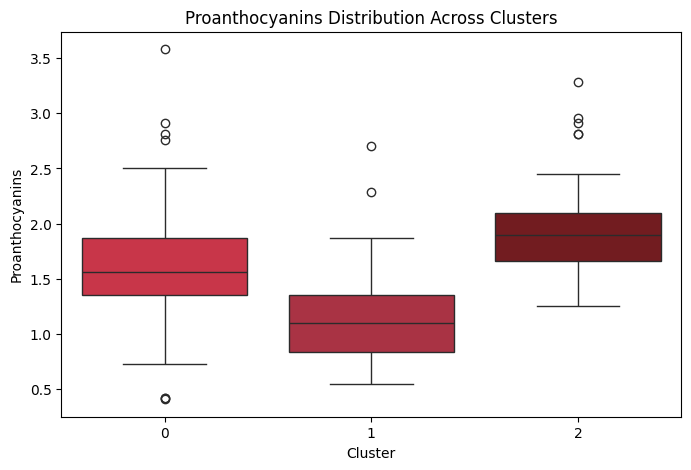

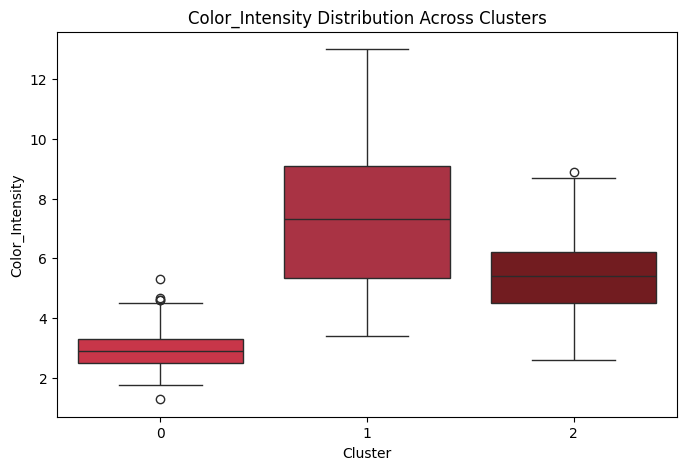

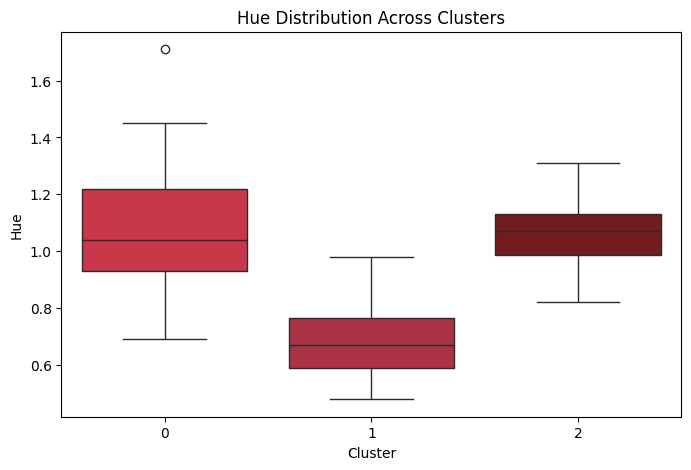

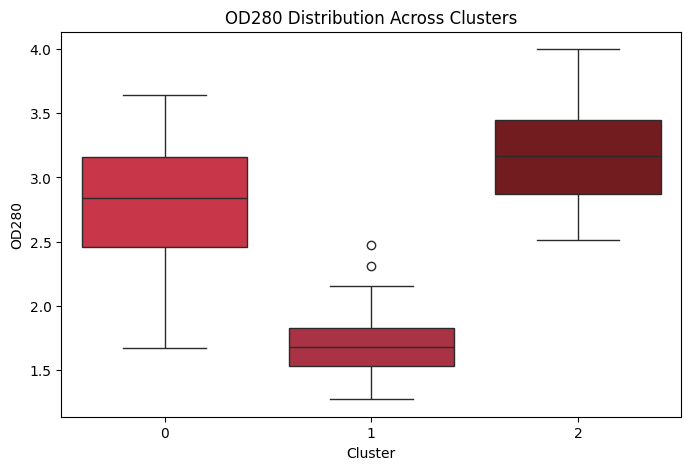

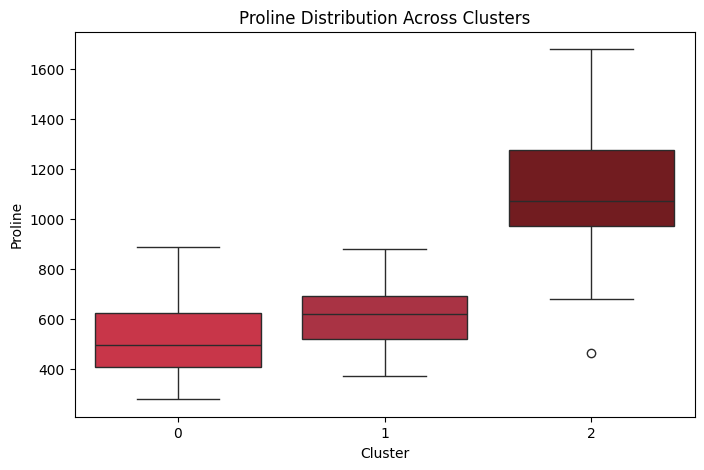

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


feature_columns = [col for col in df.columns if col != 'Cluster']

for col in feature_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Cluster', y=col, hue='Cluster', palette=wine_palette, legend=False)
    plt.title(f'{col} Distribution Across Clusters')
    plt.show()


**Evaluate Clustering Quality (Silhouette Score)**

In [30]:
from  sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.28


The silhouette score for the clustering model is **0.28**, which is **low**. This indicates that the clusters are not well-separated.